<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

## Prepare Environment

Jupyter notebook housekeeping

In [2]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline


### Install local canswim package

In [3]:
# pip install -r requirements.txt
# !pip install -e ./

import sys
!{sys.executable} -m pip install -e ./


Obtaining file:///home/ivelin/canswim
  Preparing metadata (setup.py) ... done
  Attempting uninstall: canswim
    Found existing installation: canswim 0.0.1
    Uninstalling canswim-0.0.1:
      Successfully uninstalled canswim-0.0.1
  Running setup.py develop for canswim


## Prepare Model

### Load Data

In [4]:
from canswim.model import CanswimModel

canswim_model = CanswimModel()


n_test_range_days: 630
min_samples: 1890
Configuring CUDA GPU


In [5]:
canswim_model.covariates.load_institutional_symbol_ownership()

inst_symbol_ownership_df.columns Index(['symbol', 'date', 'cik', 'investorsHolding', 'lastInvestorsHolding',
       'investorsHoldingChange', 'numberOf13Fshares', 'lastNumberOf13Fshares',
       'numberOf13FsharesChange', 'totalInvested', 'lastTotalInvested',
       'totalInvestedChange', 'ownershipPercent', 'lastOwnershipPercent',
       'ownershipPercentChange', 'newPositions', 'lastNewPositions',
       'newPositionsChange', 'increasedPositions', 'lastIncreasedPositions',
       'increasedPositionsChange', 'closedPositions', 'lastClosedPositions',
       'closedPositionsChange', 'reducedPositions', 'lastReducedPositions',
       'reducedPositionsChange', 'totalCalls', 'lastTotalCalls',
       'totalCallsChange', 'totalPuts', 'lastTotalPuts', 'totalPutsChange',
       'putCallRatio', 'lastPutCallRatio', 'putCallRatioChange'],
      dtype='object')


In [6]:
canswim_model.covariates.inst_symbol_ownership_df

cik  investorsHolding  lastInvestorsHolding  \
symbol date                                                            
KRYS   2023-09-30  1711279.0               194                   192   
       2023-06-30  1711279.0               192                   164   
       2023-03-31  1711279.0               164                   157   
       2022-12-31  1711279.0               157                   149   
       2022-09-30  1711279.0               149                   134   
...                      ...               ...                   ...   
FA     2022-06-30  1210677.0               118                    97   
       2022-03-31  1210677.0                97                    94   
       2021-12-31  1210677.0                94                    82   
       2021-09-30  1210677.0                82                    85   
       2021-06-30  1210677.0                85                     0   

                   investorsHoldingChange  numberOf13Fshares  \
symbol date                                                    
KRYS   2023-09-30                       2           23762364   
       2023-06-30                      28           23021681   
       2023-03-31                       7           20895209   
       2022-12-31                       8           20887057   
       2022-09-30                      15           20785847   
...                                   ...                ...   
FA     2022-06-30                      21          142616457   
       2022-03-31                       3          141238077   
       2021-12-31                      12          140722761   
       2021-09-30                      -3          142878855   
       2021-06-30                      85          141283954   

                   lastNumberOf13Fshares  numberOf13FsharesChange  \
symbol date                                                         
KRYS   2023-09-30               23021681                   740683   
       2023-06-30               20895209                  2126472   
       2023-03-31               20887057                     8152   
       2022-12-31               20785847                   101210   
       2022-09-30               20759578                    26269   
...                                  ...                      ...   
FA     2022-06-30              141238077                  1378380   
       2022-03-31              140722761                   515316   
       2021-12-31              142878855                 -2156094   
       2021-09-30              141283954                  1594901   
       2021-06-30                      0                141283954   

                   totalInvested  lastTotalInvested totalInvestedChange  ...  \
symbol date                                                              ...   
KRYS   2023-09-30   2.756520e+09       2.702356e+09            54163921  ...   
       2023-06-30   2.702356e+09       1.672239e+09          1030117045  ...   
       2023-03-31   1.672239e+09       1.654197e+09            18042048  ...   
       2022-12-31   1.654197e+09       1.448874e+09           205323568  ...   
       2022-09-30   1.448874e+09       1.362847e+09            86026859  ...   
...                          ...                ...                 ...  ...   
FA     2022-06-30   1.807023e+09       2.846867e+09         -1039843707  ...   
       2022-03-31   2.846867e+09       2.678796e+09           168070696  ...   
       2021-12-31   2.678796e+09       2.721840e+09           -43044052  ...   
       2021-09-30   2.721840e+09       2.813034e+09           -91193170  ...   
       2021-06-30   2.813034e+09       0.000000e+00          2813033500  ...   

                   reducedPositionsChange  totalCalls  lastTotalCalls  \
symbol date                                                             
KRYS   2023-09-30                      -6     90300.0         43500.0   
       2023-06-30                       2     43500.0         26800.0   
       2023-03-31       

In [7]:
canswim_model.covariates.inst_symbol_ownership_df.dtypes

cik                         float64
investorsHolding              int64
lastInvestorsHolding          int64
investorsHoldingChange        int64
numberOf13Fshares             int64
lastNumberOf13Fshares         int64
numberOf13FsharesChange       int64
totalInvested               float64
lastTotalInvested           float64
totalInvestedChange          object
ownershipPercent            float64
lastOwnershipPercent        float64
ownershipPercentChange      float64
newPositions                  int64
lastNewPositions              int64
newPositionsChange            int64
increasedPositions            int64
lastIncreasedPositions        int64
increasedPositionsChange      int64
closedPositions               int64
lastClosedPositions           int64
closedPositionsChange         int64
reducedPositions              int64
lastReducedPositions          int64
reducedPositionsChange        int64
totalCalls                  float64
lastTotalCalls              float64
totalCallsChange            

In [8]:
list(canswim_model.covariates.inst_symbol_ownership_df.index.get_level_values(0).unique())

['KRYS',
 'AXSM',
 'SR',
 'BUSE',
 'TDY',
 'BKKT',
 'ATGE',
 'IRWD',
 'HOUS',
 'FULT',
 'IGT',
 'WY',
 'ICHR',
 'AFYA',
 'DAWN',
 'AKYA',
 'MSTR',
 'AMRK',
 'PFE',
 'ALE',
 'ALL',
 'FMBH',
 'CADE',
 'GOOD',
 'MC',
 'LHX',
 'PGEN',
 'AIN',
 'ALEC',
 'DZSI',
 'VSEC',
 'DDS',
 'ASAN',
 'XP',
 'FOSL',
 'BHIL',
 'MYGN',
 'OMGA',
 'BYND',
 'FIP',
 'CMRE',
 'ASLE',
 'NBIX',
 'OB',
 'TT',
 'EXC',
 'TMST',
 'NREF',
 'SKIN',
 'ENVX',
 'NSSC',
 'MOD',
 'TREX',
 'TWLO',
 'PRM',
 'BSX',
 'CWH',
 'NXDT',
 'EVCM',
 'WM',
 'XRAY',
 'TSE',
 'OMC',
 'CHCT',
 'AIR',
 'BRBS',
 'CPB',
 'RES',
 'ITOS',
 'ALG',
 'MYE',
 'MLKN',
 'PPG',
 'XHR',
 'IPSC',
 'EVER',
 'SBOW',
 'UHG',
 'DIS',
 'JBI',
 'QLYS',
 'GPN',
 'OPRX',
 'HALO',
 'NSP',
 'RLGT',
 'NKTX',
 'KMB',
 'KLTR',
 'SAH',
 'ARDX',
 'EL',
 'FSR',
 'CVGW',
 'PFIS',
 'QIPT',
 'EIG',
 'HES',
 'NVEC',
 'DCGO',
 'TEAM',
 'GLBE',
 'ALKS',
 'SMAR',
 'GCI',
 'EVEX',
 'AVPT',
 'SFIX',
 'ENR',
 'FDX',
 'NEWT',
 'ULH',
 'FUL',
 'URGN',
 'QSI',
 'JBHT',
 'AMPS',
 '

In [9]:
canswim_model.load_data()

inst_symbol_ownership_df.columns Index(['symbol', 'date', 'cik', 'investorsHolding', 'lastInvestorsHolding',
       'investorsHoldingChange', 'numberOf13Fshares', 'lastNumberOf13Fshares',
       'numberOf13FsharesChange', 'totalInvested', 'lastTotalInvested',
       'totalInvestedChange', 'ownershipPercent', 'lastOwnershipPercent',
       'ownershipPercentChange', 'newPositions', 'lastNewPositions',
       'newPositionsChange', 'increasedPositions', 'lastIncreasedPositions',
       'increasedPositionsChange', 'closedPositions', 'lastClosedPositions',
       'closedPositionsChange', 'reducedPositions', 'lastReducedPositions',
       'reducedPositionsChange', 'totalCalls', 'lastTotalCalls',
       'totalCallsChange', 'totalPuts', 'lastTotalPuts', 'totalPutsChange',
       'putCallRatio', 'lastPutCallRatio', 'putCallRatioChange'],
      dtype='object')


In [10]:
canswim_model.prepare_data()

n_stocks:  50
n_epochs:  10
Training loop stock subset: ['CMG', 'RNST', 'CLFD', 'ARDX', 'XOM', 'HBNC', 'PARA', 'UFPI', 'CENTA', 'XNCR', 'PFE', 'OLP', 'NRIM', 'MHO', 'BCOV', 'UE', 'KRO', 'CRL', 'APPS', 'EVA', 'GFF', 'TWLO', 'CXW', 'FCPT', 'TECH', 'HTLD', 'GNL', 'SHBI', 'MTRN', 'HL', 'EGO', 'UVE', 'WLFC', 'EMR', 'LANC', 'PXD', 'TELL', 'VVX', 'NGVC', 'SWX', 'BRBS', 'ACTG', 'FE', 'MLKN', 'CNOB', 'KOP', 'NOG', 'VECO', 'PRPL', 'OSG']
Preparing ticker series for 50 stocks.
Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
No analyst estimates available for BRBS
Skipping BRBS covariates stack due to error:  'BRBS'
Added holidays to ticker series.
Removing time series for tickers with incomplete data sets: {'GNL', 'BRBS', 'PRPL', 'MLKN', 'PARA', 'OSG'}. Keeping {'CMG', 'TWLO', 'ARDX', 'EVA', 'PXD', 'TELL', 'UVE', 'HTLD', 'CNOB

In [79]:
iseries = canswim_model.covariates.prepare_institutional_symbol_ownership_series(stock_price_series=canswim_model.stock_price_series)

preparing past covariates: institutional ownership of symbol


In [81]:
key, value = list(iseries.items())[1]

In [82]:
key

'UBSI'

In [83]:
value.pd_dataframe()

component,cik,investorsHolding,lastInvestorsHolding,investorsHoldingChange,numberOf13Fshares,lastNumberOf13Fshares,numberOf13FsharesChange,totalInvested,lastTotalInvested,totalInvestedChange,...,reducedPositionsChange,totalCalls,lastTotalCalls,totalCallsChange,totalPuts,lastTotalPuts,totalPutsChange,putCallRatio,lastPutCallRatio,putCallRatioChange
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000
1991-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000
1991-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000
1991-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000
1991-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16,729986.0,305.0,295.0,10.0,91156633.0,96486260.0,-5329627.0,3.862987e+09,4.367849e+09,-504861983.0,...,2.0,8100.0,153525.0,-145425.0,8200.0,8500.0,-300.0,1.0123,0.0554,95.698
2024-01-17,729986.0,305.0,295.0,10.0,91156633.0,96486260.0,-5329627.0,3.862987e+09,4.367849e+09,-504861983.0,...,2.0,8100.0,153525.0,-145425.0,8200.0,8500.0,-300.0,1.0123,0.0554,95.698
2024-01-18,729986.0,305.0,295.0,10.0,91156633.0,96486260.0,-5329627.0,3.862987e+09,4.367849e+09,-504861983.0,...,2.0,8100.0,153525.0,-145425.0,8200.0,8500.0,-300.0,1.0123,0.0554,95.698


In [84]:
value

<TimeSeries (DataArray) (Date: 8625, component: 34, sample: 1)>
array([[[0.00000e+00],
        [0.00000e+00],
        [0.00000e+00],
        ...,
        [0.00000e+00],
        [0.00000e+00],
        [0.00000e+00]],

       [[0.00000e+00],
        [0.00000e+00],
        [0.00000e+00],
        ...,
        [0.00000e+00],
        [0.00000e+00],
        [0.00000e+00]],

       [[0.00000e+00],
        [0.00000e+00],
        [0.00000e+00],
        ...,
...
        ...,
        [1.01230e+00],
        [5.54000e-02],
        [9.56980e+01]],

       [[7.29986e+05],
        [3.05000e+02],
        [2.95000e+02],
        ...,
        [1.01230e+00],
        [5.54000e-02],
        [9.56980e+01]],

       [[7.29986e+05],
        [3.05000e+02],
        [2.95000e+02],
        ...,
        [1.01230e+00],
        [5.54000e-02],
        [9.56980e+01]]])
Coordinates:
  * Date       (Date) datetime64[ns] 1991-01-01 1991-01-02 ... 2024-01-22
  * component  (component) object 'cik' ... 'putCallRatioChange'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [85]:
value.static_covariates_values()

In [87]:
value.pd_dataframe().index.has_duplicates

False

In [22]:
assert False

AssertionError: 

In [21]:

canswim_model.load_data()  


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# canswim_model.covariates.load_past_covariates()
# canswim_model.covariates.load_future_covariates()

### Prepare Data

In [36]:

def prepare_data():
    canswim_model.prepare_data()
    canswim_model.plot_splits()
    canswim_model.plot_seasonality()



n_stocks:  50
n_epochs:  10
Training loop stock subset: ['CLS', 'SP', 'PLX', 'ALEX', 'AIZ', 'OMCL', 'PEP', 'ITCI', 'LMT', 'MFC', 'CB', 'UBS', 'NHC', 'CAG', 'CDXS', 'COP', 'CAL', 'FIBK', 'ASGN', 'WBA', 'AIN', 'GEL', 'AMNB', 'EQIX', 'PGTI', 'PEBO', 'THS', 'VTOL', 'HRI', 'ASML', 'MRNS', 'TSLA', 'QIPT', 'TMO', 'CBRE', 'MCFT', 'STRS', 'WGO', 'JPM', 'DRH', 'VYGR', 'RVTY', 'ON', 'EGY', 'HROW', 'WMK', 'WSR', 'TRV', 'DFS', 'KW']
Preparing ticker series for 50 stocks.
Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
preparing model data
preparing past covariates
preparing past covariates: price and volume
preparing past covariates: earnings estimates 
stacking covariates
preparing past covariates: key metrics
Skipping RVTY due to error:  "['RVTY'] not in index"
stacking covariates
Skipping RVTY covariates stack due to error:  

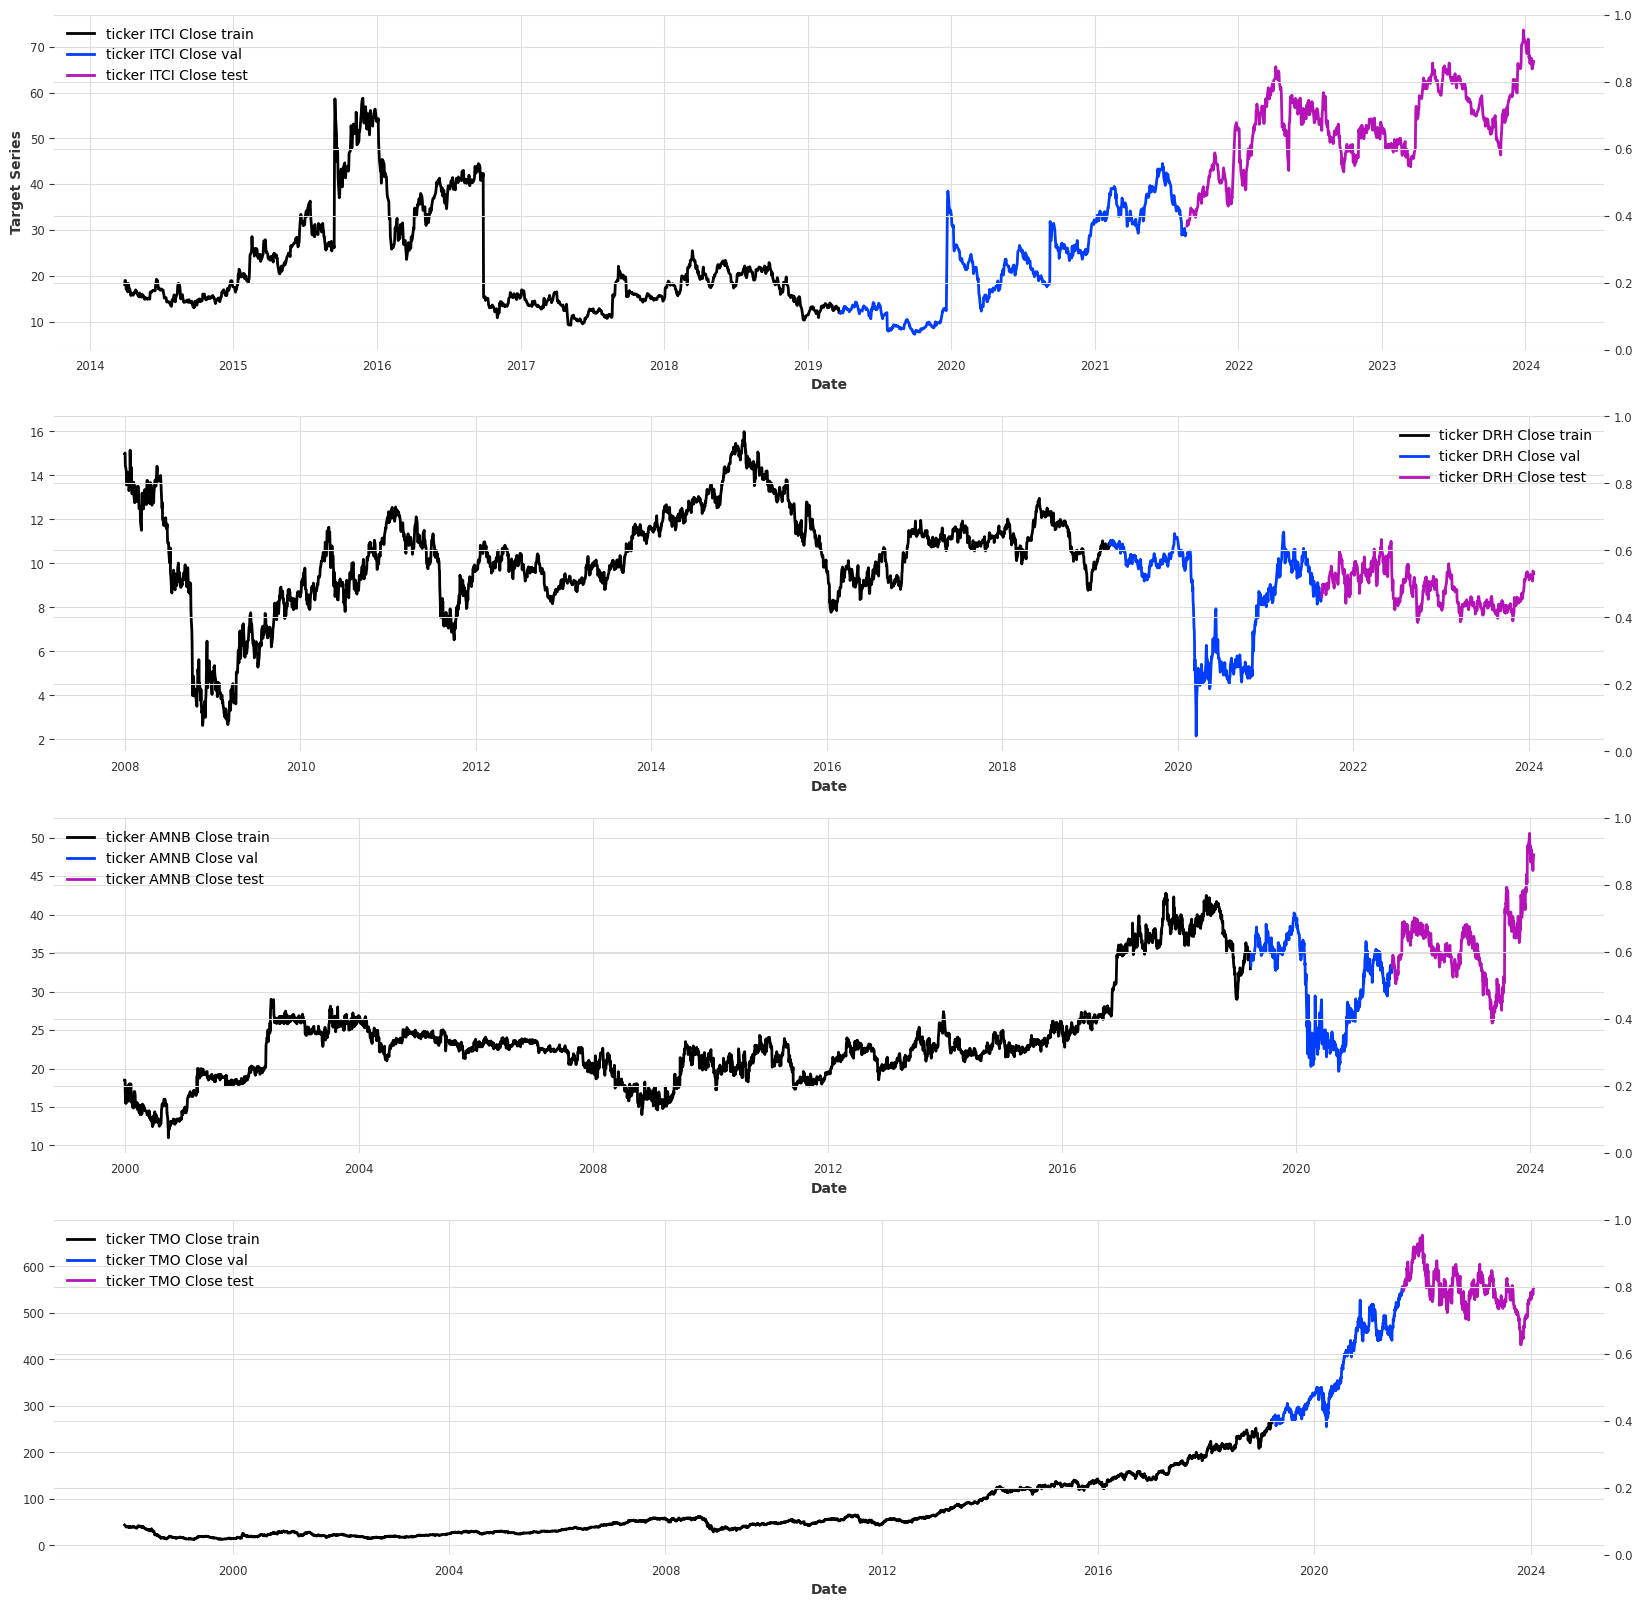

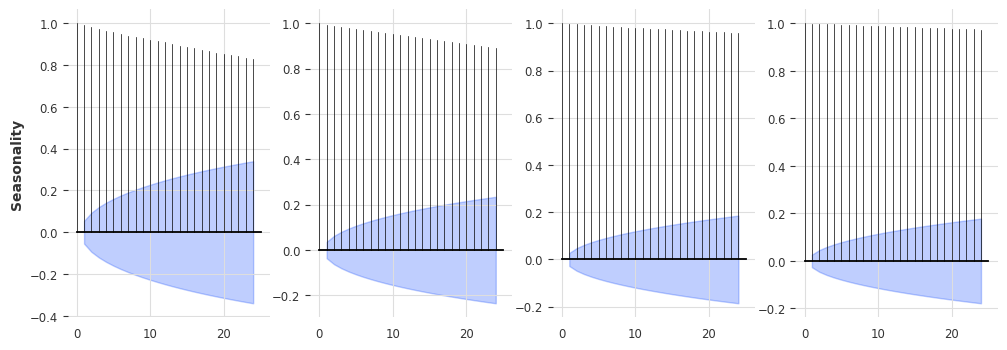

In [88]:
prepare_data()

In [89]:
canswim_model.stock_tickers

['CLS',
 'SP',
 'PLX',
 'ALEX',
 'AIZ',
 'OMCL',
 'PEP',
 'ITCI',
 'LMT',
 'MFC',
 'CB',
 'UBS',
 'NHC',
 'CAG',
 'CDXS',
 'COP',
 'CAL',
 'FIBK',
 'ASGN',
 'WBA',
 'AIN',
 'GEL',
 'AMNB',
 'EQIX',
 'PGTI',
 'PEBO',
 'THS',
 'VTOL',
 'HRI',
 'ASML',
 'MRNS',
 'TSLA',
 'QIPT',
 'TMO',
 'CBRE',
 'MCFT',
 'STRS',
 'WGO',
 'JPM',
 'DRH',
 'VYGR',
 'RVTY',
 'ON',
 'EGY',
 'HROW',
 'WMK',
 'WSR',
 'TRV',
 'DFS',
 'KW']

In [90]:
t = list(canswim_model.targets.target_series.keys())[0]
t

'ITCI'

In [91]:
canswim_model.target_train_list[0].pd_dataframe()

component,Close
Date,
1996-12-31,22.006414
1997-01-01,21.887461
1997-01-02,21.768507
1997-01-03,21.768507
1997-01-06,21.649553
...,...
2019-03-18,73.739998
2019-03-19,74.129997
2019-03-20,73.830002


In [92]:
future_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)
past_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)

In [93]:
len(canswim_model.targets_list)

46

In [94]:
len(canswim_model.target_train_list)

46

In [95]:
len(canswim_model.past_cov_list)

46

In [96]:
len(canswim_model.future_cov_list)

46

## Find optimal hyper parameters

In [97]:
canswim_model.find_model()


[I 2024-01-30 09:37:04,593] A new study created in memory with name: no-name-9e1acb96-5ef4-4737-a7d0-8499ff04a9a5


  0%|          | 0/100 [00:00<?, ?it/s]

Creating a new model
[W 2024-01-30 09:37:12,284] Trial 0 failed with parameters: {'input_chunk_length': 483, 'output_chunk_length': 62, 'hidden_size': 768, 'num_encoder_layers': 2, 'num_decoder_layers': 3, 'decoder_output_dim': 8, 'temporal_decoder_hidden': 48, 'dropout': 0.5, 'use_layer_norm': True, 'use_reversible_instance_norm': False, 'lr': 0.025455395411392762} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/home/ivelin/canswim/src/canswim/model.py", line 745, in _optuna_objective
    model.fit(
  File "/home/ivelin/anaconda3/envs/canswim/lib/python3.11/site-packages/darts/utils/torch.py", line 112, in decorator
    return decorated(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ivelin/anaconda3/envs/canswim/l

KeyboardInterrupt: 

In [ ]:
len(canswim_model.targets_list)

In [ ]:
len(canswim_model.target_train_list)

In [ ]:
len(canswim_model.past_cov_list)

In [ ]:
len(canswim_model.future_cov_list)

In [ ]:
from darts.models import TiDEModel

model = TiDEModel.load_from_checkpoint(canswim_model.model_name)


In [ ]:
canswim_model.load_model()


In [ ]:
preds = model.predict(
    n=model.output_chunk_length,
    series=canswim_model.target_train_list,
    mc_dropout=True,
    num_samples=500,
    past_covariates=canswim_model.past_cov_list,
    future_covariates=canswim_model.future_cov_list,
    num_loader_workers=4,
)

In [ ]:
preds[0]

In [ ]:
len(preds)

In [ ]:
from darts.metrics import quantile_loss

loss = quantile_loss(canswim_model.targets_list, preds, n_jobs=-1, verbose=True)


In [ ]:
import numpy as np
loss_val = np.mean(loss)
loss_val  

In [ ]:
canswim_model.test()
canswim_model.plot_test_results()    


In [ ]:
len(canswim_model.targets_list)

In [ ]:
# thorough backtest of model checkpoint
start_list = canswim_model.get_val_start_list()
backtest, test_error = canswim_model.backtest(series=canswim_model.targets_list[0], start=start_list[0],
                                              past_covariates=canswim_model.past_cov_list[0], future_covariates=canswim_model.future_cov_list[0],
                                              forecast_horizon=canswim_model.pred_horizon)        
print(f"Backtest Quantile Loss = {test_error}")


In [ ]:
canswim_model.plot_backtest_results(target=canswim_model.targets_list[0], backtest=backtest, start=start_list[0], forecast_horizon=canswim_model.pred_horizon)    

In [ ]:
assert False

In [ ]:
# if a model has not been selected and saved yet
# run a hyper parameter search
# otherwise load saved model and continue training
if not canswim_model.load_model():
    # find and save the optimal model configuration
    canswim_model.find_model()

## Train model

### Run model training loop

In [ ]:

# train loop
for i in range(10):
    # align all data series for training
    canswim_model.train()
    # save model checkpoint
    canswim_model.save()
    # quick test progress at modelcheckpoing
    canswim_model.test()
    canswim_model.plot_test_results()    
    # thorough backtest of model checkpoint
    backtest, test_error = canswim_model.backtest()        
    print(f"Backtest Quantile Loss = {test_error}")
    canswim_model.plot_backtest_results(backtest)    
    # prepare next sample subset
    prepare_data()
 